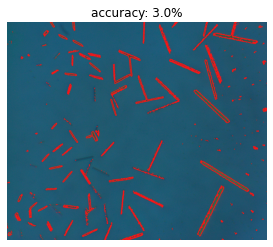

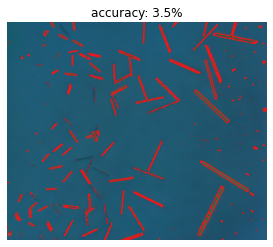

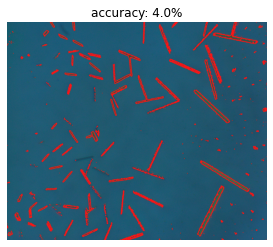

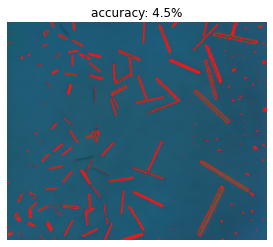

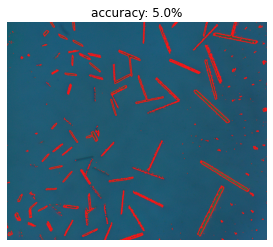

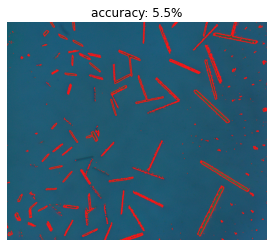

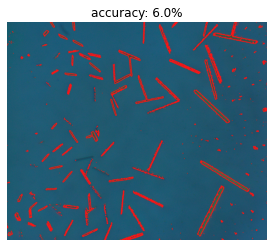

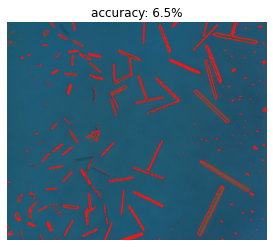

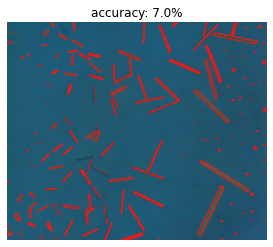

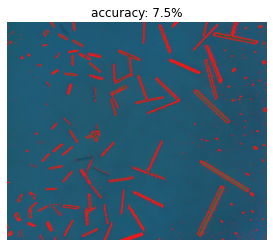

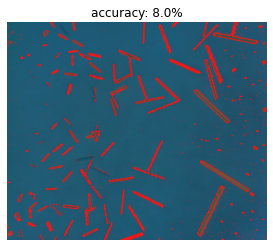

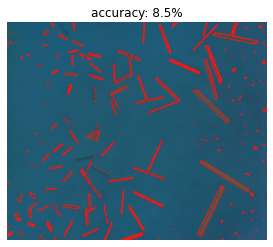

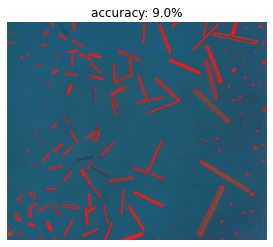

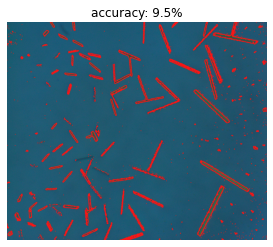

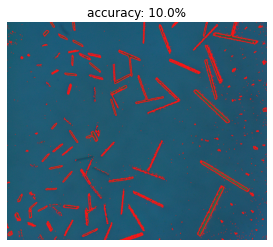

In [9]:
import cv2 as cv
import numpy as np
from colorama import Fore, Style
from matplotlib import pyplot as plt


def combine(img, img_gray):
    rows_rgb, cols_rgb, channels = img.shape
    rows_gray, cols_gray = img_gray.shape
    cols_comb = max(cols_rgb, cols_gray)
    rows_comb = rows_rgb + rows_gray
    comb = np.zeros(shape=(rows_comb, cols_comb, channels), dtype=np.uint8)
    comb[:rows_rgb, :cols_rgb] = img
    comb[rows_rgb:, :cols_gray] = img_gray[:, :, None]
    return comb


def limits(img, accuracy):
    img_temp = img.copy()

    pixels = np.array(img_temp.reshape(-1, 3))
    pixels = pixels[pixels[:, 2].argsort()]
    v, vc = np.unique(pixels[:, 2], axis=0, return_counts=True)
    s, sc = np.unique(pixels[:, 1], axis=0, return_counts=True)
    h, hc = np.unique(pixels[:, 0], axis=0, return_counts=True)

    new_h = []
    m = max(hc)
    i = np.where(hc == m)[0]
    amount = accuracy/100 * m
    '''for i in range(len(h)):
        if hc[i] > amount:
            new_h.append(h[i])'''
    j = 1
    while i - j >= 0:
        if hc[i - j] > amount:
            j += 1
        elif hc[i - j] - amount <= 1e-4:
            beg = h[i - j]
            break
        else:
            beg = (h[i - j] + h[i - j + 1]) / 2
            break
    if i - j < 0:
        print(f"{Fore.RED}     (!)     Didn't reach the beginning!{Style.RESET_ALL}")
        beg = h[0]
    j = 1
    while i + j < len(h):
        if hc[i + j] > amount:
            j += 1
        elif hc[i + j] - amount <= 1e-4:
            end = h[i + j]
            break
        else:
            end = (h[i + j] + h[i + j - 1]) / 2
            break
    if i + j >= len(h):
        print(f"{Fore.RED}     (!)     Didn't reach the end!{Style.RESET_ALL}")
        end = h[-1]

    return int(beg), int(end)


def automised(grain_size, accuracy):
    img = cv.imread('res/cached_image.png')
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    min_h, max_h = limits(img_hsv, accuracy)
    thresh = cv.inRange(img_hsv, (min_h, 0, 0), (max_h, 1e3, 1e3))
    thresh = cv.medianBlur(thresh, 3)
    # thresh = cv.GaussianBlur(thresh, (5, 5), 0)
    thresh = cv.bitwise_not(thresh)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(img, contours, -1, (20, 20, 255), 5)
    #img = combine(img, thresh)
    return img

for i in np.arange(3, 10.5, 0.5):
    img = automised(10, i)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'accuracy: {i}%')
    plt.show()